In [25]:
import pandas as pd
import numpy as np
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
def download_stock_data(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()
    return stock_data

In [27]:
def statistics(data, column_name):
    mean = data[column_name].mean()
    std_dev = data[column_name].std()
    sample_size = data[column_name].count()
    z_scores = (data[column_name] - mean) / std_dev

    t_scores = stats.t.ppf((1 + 0.95) / 2., sample_size - 1)

    margin_of_error = t_scores * (std_dev / np.sqrt(sample_size))
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)

    return z_scores, confidence_interval 

In [28]:
def plot_distributions(data, column_name, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column_name].dropna(), kde=True, stat="density", bins=30, color="blue", alpha=0.6)
    plt.title(f"Probability Distribution of {title}", fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.show()


[*********************100%%**********************]  1 of 1 completed

(81843.61572100676, 104684.1321050802)
(3304.1446661224018, 3349.4136282899626)
(-0.0006762869403357161, 0.0024505495482444054)


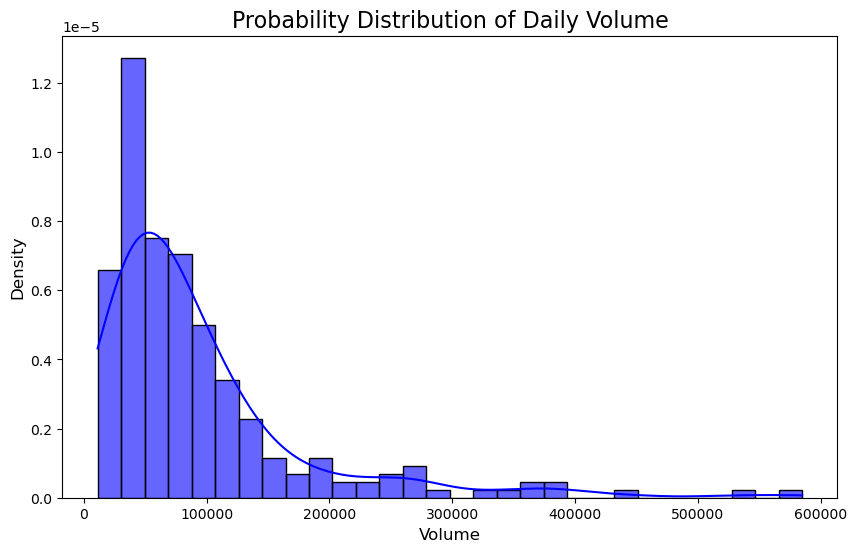

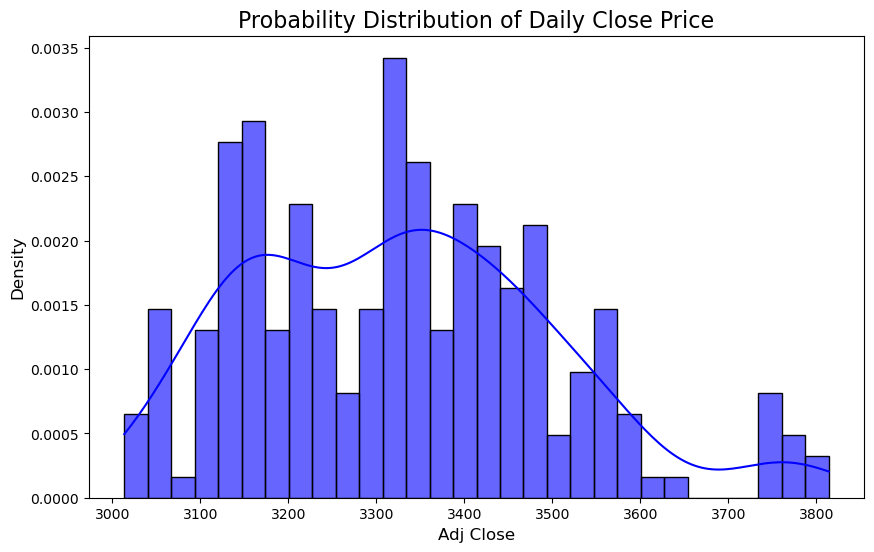

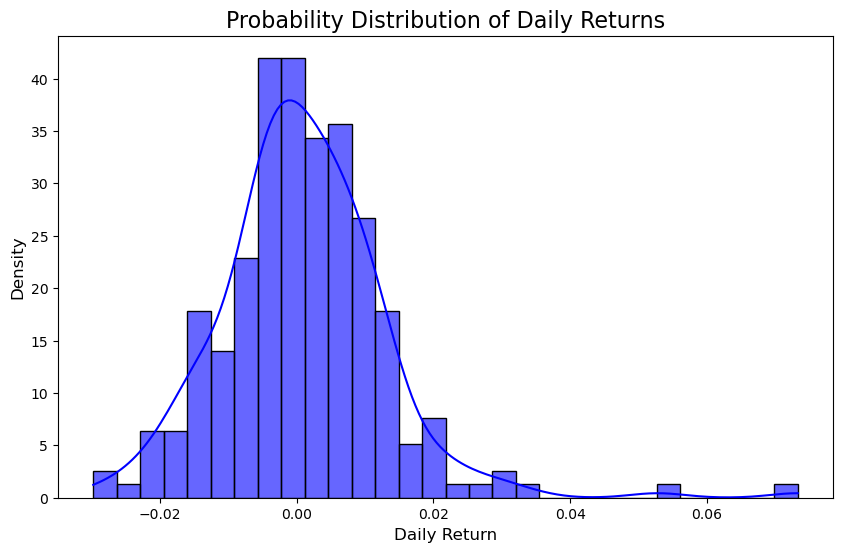

In [29]:
stock_symbol = "TCS.BO"  
start_date = "2023-01-01"
end_date = "2023-12-31"

stock_data = download_stock_data(stock_symbol, start_date, end_date)

z_scores_volume, confidence_interval_volume = statistics(stock_data, 'Volume')
print(confidence_interval_volume)

z_scores_close, confidence_interval_close = statistics(stock_data, 'Adj Close')
print(confidence_interval_close)

z_scores_returns, confidence_interval_returns = statistics(stock_data, 'Daily Return')
print(confidence_interval_returns)

# Plot distributions
plot_distributions(stock_data, 'Volume', 'Daily Volume')
plot_distributions(stock_data, 'Adj Close', 'Daily Close Price')
plot_distributions(stock_data, 'Daily Return', 'Daily Returns')